In [1]:
# load the packages we need to benchmark the package 
using CompSense; 
using LinearAlgebra; 
using Random; 
using Plots; 
using Distributed;
using Statistics; 

LoadError: ArgumentError: Package CompSense not found in current path.
- Run `import Pkg; Pkg.add("CompSense")` to install the CompSense package.

In [5]:
# local error_sl0, error_em, error_irwls, p, k, CV, ns, n; 
p, k = 20, 8;   # number of columns, number of non-zeros 
CV = 25;          # number of randomized trials
ns = 2:17;        # iterator for the number of rows 

error_em = zeros(length(ns), CV); 
error_sl0 = zeros(length(ns), CV);
error_irwls = zeros(length(ns), CV);

for j in 1:CV
    println(j);
     for n in ns
        # generate the data 
        A, x, y = cs_model(n, p, k, "Gaussian");
        
        # run the CS algorithms 
        xsl0 = SL0(A, y);
        xem = L0EM(A, y);
        xls = IRWLS(A, y);
        
        # measure the error 
        error_em[n-minimum(ns)+1, j] += norm(xem-x)/norm(x);
        error_sl0[n-minimum(ns)+1, j] += norm(xsl0-x)/norm(x);
        error_irwls[n-minimum(ns)+1, j] += norm(xls-x)/norm(x);
    end
end

# error_sl0 /= CV;
# error_em /= CV;
#error_irwls /= CV;
# error_sl0 = mean(error_sl0, dims=2);
# error_em = mean(error_em, dims=2);
# error_irwls = mean(error_irwls, dims=2);

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [6]:
error_sl0 = mean(error_sl0, dims=2);
error_em = mean(error_em, dims=2);
error_irwls = mean(error_irwls, dims=2);

┌ Warning: Skipped marker arg o.
└ @ Plots C:\Users\grego\.julia\packages\Plots\4UbNP\src\args.jl:1180
┌ Warning: Skipped marker arg o.
└ @ Plots C:\Users\grego\.julia\packages\Plots\4UbNP\src\args.jl:1180
┌ Warning: Skipped marker arg o.
└ @ Plots C:\Users\grego\.julia\packages\Plots\4UbNP\src\args.jl:1180


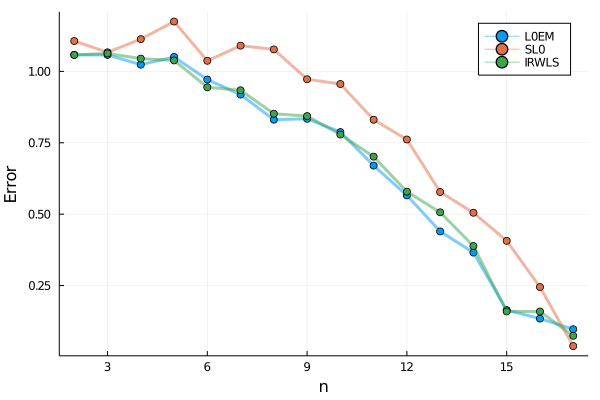

In [8]:
plot(ns, error_em, label="L0EM", line=(0.5, 3), marker="o")
plot!(ns, error_sl0, label="SL0", line=(0.5, 3), marker="o", xlabel="n", ylabel="Error")
plot!(ns, error_irwls, label="IRWLS", line=(0.5, 3), marker="o")